# 605.621 - Foundations of Algorithms

## Assignment 05

Sabbir Ahmed

April 18, 2021

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

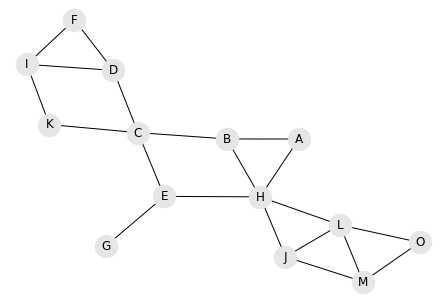

In [2]:
def draw_graph(_g):
    nx.draw(_g, nx.kamada_kawai_layout(_g), node_size=500, node_color='0.9', with_labels=True)

Edges = [('A','B'),('A','H'),('B','C'),('B','H'),('C','D'),('C','E'),('D','F'),('D','I'),('C','K'),
         ('E','G'),('E','H'),('F','I'),('H','J'),('H','L'),('I','K'),('J','L'),('L','M'),
         ('L','O'), ('J','M'), ('M','O')]

G = nx.Graph()
G.add_edges_from(Edges)

draw_graph(G)

### Question 1

\[20 pts, Huffman coding\]

Solve exercise 16.3-3 (Cormen page 436).

What is an optimal Huffman code for the following set of frequencies, based on the first 8 Fibonacci numbers?

`a:1 b:1 c:2 d:3 e:5 f:8 g:13 h:21`

Can you generalize your answer to find the optimal code when the frequencies are the first $n$ Fibonacci numbers?

### Answer



Building a Huffman tree with the given frequencies:

```
54
|-------|
h:21    33
        |-------|
        g:13    20
                |-------|
                f:8     12
                        |-------|
                        e:5     7
                                |-------|
                                d:3     4
                                        |-------|
                                        c:2     2
                                                |-------|
                                                b:1     a:1
```

Where the left child has a weight of 0 and the right a weight of 1.

The Huffman codes are as follows:
- `h`: `0`
- `g`: `10`
- `f`: `110`
- `e`: `1110`
- `d`: `11110`
- `c`: `111110`
- `b`: `1111110`
- `a`: `1111111`

The frequencies of the first $n$ Fibonacci numbers can be represented as the recurrence relation $F_{n+2}=F_{n+1}+F_n= \sum_{i=0}^{n}F_i+1$

-----------------------------------------

### Question 2

\[20 pts, algorithms\]

Consider evaluating a polynomial, e.g. given $f(x)=x^5 +3x^2 -x+2, f(2) = 44$

Considering the general case, where the degree of the polynomial is $n$, state (i) a naive algorithm, and (ii) a linear algorithm to evaluate polynomials for a given real valued input.

What is the type of this linear algorithm?

### Answer

-----------------------------------------

### Question 3

\[40 pts, DFS and BFS\]

Using the DFS and BFS pseudocode/Python scripts in the lecture notes, empirically show that both DFS and BFS can be completed in $O(|V|+|E|)$.

### Answer

In [3]:
# Set a vertex class to store DFS (first timestamp) and parent
class Vertex:
    def __init__(self, label):
        self.label = label
        self.dfs = None
        self.p = None
        self.seen = False


# Root is specially handled
ROOT_PARENT_LABEL = "nul"
ROOT_PARENT = Vertex(ROOT_PARENT_LABEL)

# Generate an adjacency list from the input edges _e


def adj_list(_e: list) -> (dict, dict):  # _e is a list of 2-tuples
    from collections import defaultdict
    assert type(_e) is list
    assert type(_e[0]) is tuple

    edges = defaultdict(list)
    vertices = {}  # convert the labels to vertex objects
    for v1, v2 in _e:
        if v1 not in vertices:
            vertices[v1] = Vertex(v1)
        if v2 not in vertices:
            vertices[v2] = Vertex(v2)
        edges[v1] += [vertices[v2]]
        edges[v2] += [vertices[v1]]
    # Sort adjacency list edges
    for v in edges:
        edges[v] = sorted(edges[v], key=lambda x: x.label)
    #
    return vertices, edges

# DFS uses a stack iteratively to avoid recursion, pre-order traversal
# edge list key is the vertex label


def dfs_stack(_e, _root):
    # pre-order traversal to populate dfs values
    dfscounter = 1
    stack = [_root]  # stack is simply a Python list
    while len(stack) > 0:
        v1 = stack.pop()
        print(v1.label)
        if not v1.seen:  # not visited yet
            v1.seen = True
            v1.dfs = dfscounter
            dfscounter += 1
            # edge dictionary key is vertex label, value is list of nodes
            for v2 in _e[v1.label]:
                if not v2.seen:  # not visited yet
                    v2.p = v1  # set parent
                    stack += [v2]
    print(dfscounter)


In [4]:
vertices1, edges1 = adj_list(Edges)
# Set the root
root = vertices1['A']
root.p = ROOT_PARENT
dfs_stack(edges1, root)

A
H
L
O
M
J
M
J
J
E
G
C
K
I
F
D
D
D
B
B
B
15


In [5]:
randomg = nx.gnm_random_graph(15, 20)
randomg.remove_node(0)
list(randomg.edges)
vertices1, edges1 = adj_list(list(randomg.edges))
# Set the root
root = vertices1[1]
root.p = ROOT_PARENT
dfs_stack(edges1, root)

1
6
10
11
7
12
13
2
8
14
9
4
3
3
3
8
2
3
2
5
4
15


In [6]:
# BFS uses a queue iteratively to avoid recursion, in-order traversal
# edge list key is the vertex label
def bfs(_e, _root):
    # in-order traversal to populate dfs values
    dfscounter = 1
    queue = [_root]  # queue is simply a Python list
    while len(queue) > 0:
        v1 = queue.pop(0)  # Get the first element
        if not v1.seen:  # not visited yet
            v1.seen = True
            v1.dfs = dfscounter
            dfscounter += 1
            # edge dictionary key is vertex label, value is list of nodes
            for v2 in _e[v1.label]:
                if not v2.seen:  # not visited yet
                    v2.p = v1  # set parent
                    queue += [v2]
    print(dfscounter)

vertices1, edges = adj_list(Edges)

# Set the root
root = vertices1['A']
root.p = ROOT_PARENT

bfs(edges, root)

15


-----------------------------------------

### Question 4

\[10 pts, DFS\]

Solve exercise 22.3-8 (Cormen page 611).

Give a counterexample to the conjecture that if a directed graph G contains a path from $u$ to $v$, and if $u.d < v.d$ in a depth-first search of $G$, then $v$ is a descendant of $u$ in the depth-first forest produced.

### Answer

Consider the directed graph below:

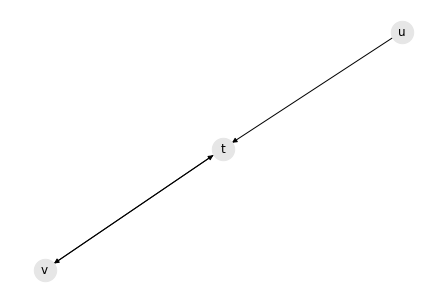

In [7]:
edges = [('u','t'), ('t','v'), ('v','t')]

G = nx.DiGraph()
G.add_edges_from(edges)
draw_graph(G)

If $t$ is the root vertex, then:

- $u.d$: 2
- $u.f$: 3
- $v.d$: 4
- $v.f$: 5

Therefore, if there is a path from $u$ to $v$, with $u.d < v.d$, $v$ does not have to be a descendant of $u$.

-----------------------------------------

### Question 5

\[10 pts, DFS\]

Solve exercise 22.3-9 (Cormen page 612).

Give a counterexample to the conjecture that if a directed graph $G$ contains a path from $u$ to $v$, then any depth-first search must result in $v.d \le u.f$.

### Answer

Consider the directed graph below:

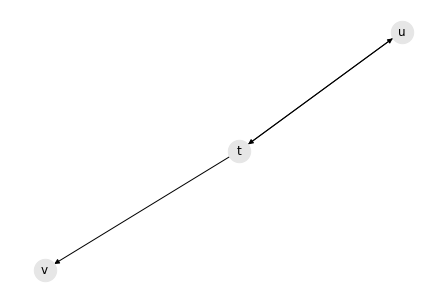

In [8]:
edges = [("t", "u"), ("t", "v"), ("u", "t")]

G = nx.DiGraph()
G.add_edges_from(edges)
draw_graph(G)

There is a path from $u$ to $v$. However, if $t$ is the source vertex for a DFS and process $u$ before $v$, then $v.d = 4 > u.f = 3$.

-----------------------------------------